In [5]:
# Import the random module.
import random
# Import the NumPy module.
import numpy as np
# Import timeit.
import timeit
import matplotlib.pyplot as plt
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy
import requests
import json
from config import weather_api_key
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime
import pandas as pd
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

random_number = random.randint(-90, 90) + random.random()
#random_number

In [6]:
x = 1
latitudes = []
while x < 11:
    random_lat = random.randint(-90, 89) + random.random()
    latitudes.append(random_lat)
    x += 1

In [7]:
%timeit np.random.uniform(-90.000, 90.000, size=1500)

12 µs ± 351 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [8]:
def latitudes(size):
    latitudes = []
    x = 0
    while x < (size):
        random_lat = random.randint(-90, 90) + random.random()
        latitudes.append(random_lat)
        x += 1
    return latitudes
# Call the function with 1500.
%timeit latitudes(1500)

1.2 ms ± 43.8 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [9]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [10]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [11]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [12]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [13]:
#pip install citipy

In [14]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

hithadhoo mv
east london za
diapaga bf
rikitea pf
hamilton bm
najran sa
pevek ru
baoro cf
palabuhanratu id
hermanus za
hermanus za
provideniya ru
north branch us
tasiilaq gl
burica pa
whitianga nz
faanui pf
mahajanga mg
rikitea pf
thompson ca
caravelas br
los llanos de aridane es
palabuhanratu id
lebu cl
jumla np
faya td
saint-joseph re
den helder nl
rikitea pf
barentsburg sj
ushuaia ar
albany au
avarua ck
dubrovka ru
illoqqortoormiut gl
coihaique cl
souillac mu
jamestown sh
bluff nz
jiuquan cn
goderich sl
rikitea pf
jacareacanga br
amderma ru
saleaula ws
gat ly
rikitea pf
ushuaia ar
puerto ayora ec
imbituba br
amderma ru
bubaque gw
norman wells ca
vilyuysk ru
twentynine palms us
kirakira sb
yumen cn
busselton au
new norfolk au
qaanaaq gl
ushuaia ar
guerrero negro mx
aklavik ca
bluff nz
ushuaia ar
cheuskiny ru
east london za
chuy uy
gwadar pk
bryan us
port elizabeth za
busselton au
tilichiki ru
makasar id
hasaki jp
tasiilaq gl
dolbeau ca
mataura pf
saint-joseph re
punta arenas cl
aklav

In [15]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

622

In [28]:
# Starting URL for Weather Map API Call.
url = "https://api.openweathermap.org/data/2.5/weather?lat=35&lon=139&appid=" + weather_api_key
#print(url)

response = requests.get(url).json()
response

{'coord': {'lon': 139, 'lat': 35},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 287.77,
  'feels_like': 287.12,
  'temp_min': 287.77,
  'temp_max': 287.77,
  'pressure': 1015,
  'humidity': 70},
 'visibility': 10000,
 'wind': {'speed': 0.45, 'deg': 115, 'gust': 1.34},
 'clouds': {'all': 94},
 'dt': 1649301290,
 'sys': {'type': 2,
  'id': 2019346,
  'country': 'JP',
  'sunrise': 1649276592,
  'sunset': 1649322537},
 'timezone': 32400,
 'id': 1851632,
 'name': 'Shuzenji',
 'cod': 200}

In [ ]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
#print(city_url)

In [18]:
# Make a 'Get' request for the city weather.
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [19]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather

<Response [200]>

In [20]:
# Get the text of the 'Get' request.
city_weather.text

'{"coord":{"lon":-71.0598,"lat":42.3584},"weather":[{"id":804,"main":"Clouds","description":"overcast clouds","icon":"04n"}],"base":"stations","main":{"temp":279.46,"feels_like":276.3,"temp_min":277.73,"temp_max":280.55,"pressure":1014,"humidity":82},"visibility":10000,"wind":{"speed":4.63,"deg":20},"clouds":{"all":100},"dt":1649299953,"sys":{"type":2,"id":2013408,"country":"US","sunrise":1649240280,"sunset":1649286892},"timezone":-14400,"id":4930956,"name":"Boston","cod":200}'

In [21]:
# Get the JSON text of the 'Get' request.
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 279.46,
  'feels_like': 276.3,
  'temp_min': 277.73,
  'temp_max': 280.55,
  'pressure': 1014,
  'humidity': 82},
 'visibility': 10000,
 'wind': {'speed': 4.63, 'deg': 20},
 'clouds': {'all': 100},
 'dt': 1649299953,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1649240280,
  'sunset': 1649286892},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [22]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City Weather found.


In [23]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Bston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")

City weather not found.


In [24]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [25]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | east london
Processing Record 3 of Set 1 | diapaga
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | hamilton
Processing Record 6 of Set 1 | najran
Processing Record 7 of Set 1 | pevek
Processing Record 8 of Set 1 | baoro
Processing Record 9 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 10 of Set 1 | hermanus
Processing Record 11 of Set 1 | provideniya
Processing Record 12 of Set 1 | north branch
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | burica
City not found. Skipping...
Processing Record 15 of Set 1 | whitianga
Processing Record 16 of Set 1 | faanui
Processing Record 17 of Set 1 | mahajanga
Processing Record 18 of Set 1 | thompson
Processing Record 19 of Set 1 | caravelas
Processing Record 20 of Set 1 | los llanos de aridane
Processing Record 21 of Set 1 | lebu
Processing Record 22 of Set 1 | jumla
Processing Record 23 of Set 1 | faya
Pro

In [37]:
len(city_data)

570

In [38]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,301.05,66,0,0.62,MV,2022-04-07 02:55:32
1,East London,-33.0153,27.9116,288.89,64,7,8.92,ZA,2022-04-07 02:55:33
2,Diapaga,12.0708,1.7889,304.20,42,84,2.63,BF,2022-04-07 02:55:33
3,Rikitea,-23.1203,-134.9692,299.03,66,1,5.25,PF,2022-04-07 02:55:34
4,Hamilton,39.1834,-84.5333,283.50,89,0,1.54,US,2022-04-07 02:44:39
5,Najran,17.4924,44.1277,287.51,13,0,1.37,SA,2022-04-07 02:55:34
6,Pevek,69.7008,170.3133,253.00,90,100,3.66,RU,2022-04-07 02:55:35
7,Baoro,5.6667,15.9667,292.53,91,90,1.21,CF,2022-04-07 02:55:35
8,Hermanus,-34.4187,19.2345,284.15,67,94,3.90,ZA,2022-04-07 02:54:12
9,Provideniya,64.3833,-173.3000,255.57,71,0,8.05,RU,2022-04-07 02:55:36


In [41]:
columnsTitles = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

city_data_df = city_data_df.reindex(columns=columnsTitles)

city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-04-07 02:55:32,-0.6000,73.0833,301.05,66,0,0.62
1,East London,ZA,2022-04-07 02:55:33,-33.0153,27.9116,288.89,64,7,8.92
2,Diapaga,BF,2022-04-07 02:55:33,12.0708,1.7889,304.20,42,84,2.63
3,Rikitea,PF,2022-04-07 02:55:34,-23.1203,-134.9692,299.03,66,1,5.25
4,Hamilton,US,2022-04-07 02:44:39,39.1834,-84.5333,283.50,89,0,1.54
...,...,...,...,...,...,...,...,...,...
565,Provost,CA,2022-04-07 03:12:06,52.3501,-110.2683,273.96,75,2,2.93
566,Aberdeen,GB,2022-04-07 03:09:50,57.1437,-2.0981,276.78,100,75,2.57
567,Pecos,US,2022-04-07 03:12:08,31.4229,-103.4932,291.10,14,0,2.57
568,Caranavi,BO,2022-04-07 03:12:09,-15.8167,-67.5500,290.69,95,52,1.24


In [42]:
# Create the output file (CSV).
output_data_file = "C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [43]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [44]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1649302387.4433198

In [45]:
time.strftime("%x")

'04/06/22'

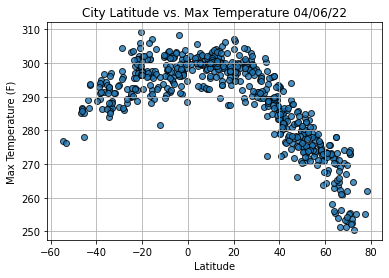

In [47]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig1.png")

# Show plot.
plt.show()

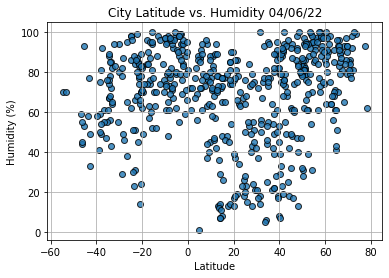

In [48]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig2.png")
# Show plot.
plt.show()

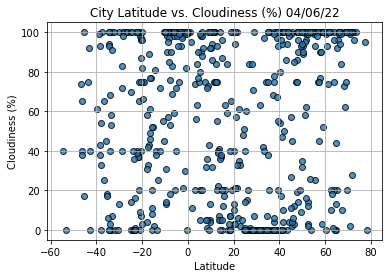

In [49]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig3.png")
# Show plot.
plt.show()

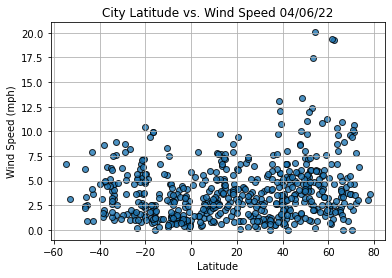

In [50]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\Fig4.png")
# Show plot.
plt.show()

In [51]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [52]:
# Create an equal number of latitudes and temperatures.
lats = [42.5, 43.9, 8.1, 36.8, 79.9, 69.1, 25.7, 15.3, 12.7, 64.5]
temps = [80.5, 75.3, 90.9, 90.0, 40.4, 62.3, 85.4, 79.6, 72.5, 72.0]

In [53]:
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, temps)
# Get the equation of the line.
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The p-value is: {p_value:.3f}")

y = -0.45x + 92.94
The p-value is: 0.011


In [54]:
# Calculate the regression line "y values" from the slope and intercept.
regress_values = [(lat * slope + intercept) for lat in lats]

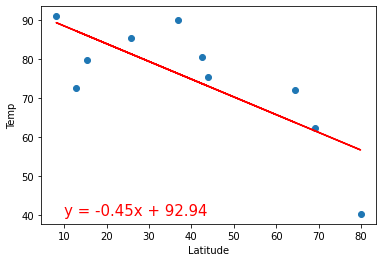

In [55]:
# Create a scatter plot of the x and y values.
plt.scatter(lats,temps)
# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats,regress_values,"r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10,40), fontsize=15, color="red")
plt.xlabel('Latitude')
plt.ylabel('Temp')
plt.show()

In [58]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [59]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Diapaga,BF,2022-04-07 02:55:33,12.0708,1.7889,304.20,42,84,2.63
4,Hamilton,US,2022-04-07 02:44:39,39.1834,-84.5333,283.50,89,0,1.54
5,Najran,SA,2022-04-07 02:55:34,17.4924,44.1277,287.51,13,0,1.37
6,Pevek,RU,2022-04-07 02:55:35,69.7008,170.3133,253.00,90,100,3.66
7,Baoro,CF,2022-04-07 02:55:35,5.6667,15.9667,292.53,91,90,1.21
...,...,...,...,...,...,...,...,...,...
564,Jacqueville,CI,2022-04-07 03:12:06,5.2052,-4.4146,299.91,85,99,2.12
565,Provost,CA,2022-04-07 03:12:06,52.3501,-110.2683,273.96,75,2,2.93
566,Aberdeen,GB,2022-04-07 03:09:50,57.1437,-2.0981,276.78,100,75,2.57
567,Pecos,US,2022-04-07 03:12:08,31.4229,-103.4932,291.10,14,0,2.57


In [60]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Diapaga,BF,2022-04-07 02:55:33,12.0708,1.7889,304.20,42,84,2.63
4,Hamilton,US,2022-04-07 02:44:39,39.1834,-84.5333,283.50,89,0,1.54
5,Najran,SA,2022-04-07 02:55:34,17.4924,44.1277,287.51,13,0,1.37
6,Pevek,RU,2022-04-07 02:55:35,69.7008,170.3133,253.00,90,100,3.66
7,Baoro,CF,2022-04-07 02:55:35,5.6667,15.9667,292.53,91,90,1.21


In [61]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

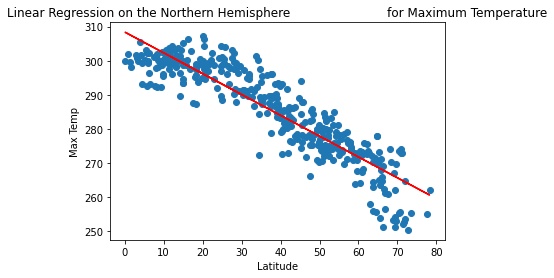

In [62]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

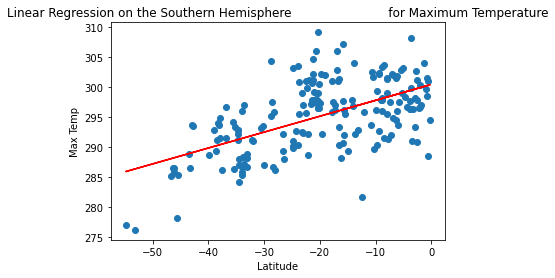

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

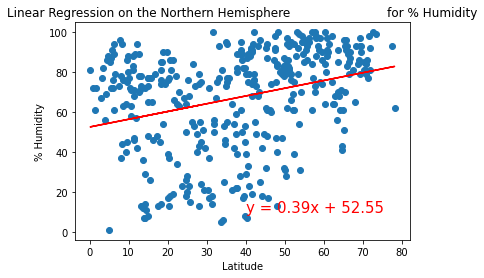

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

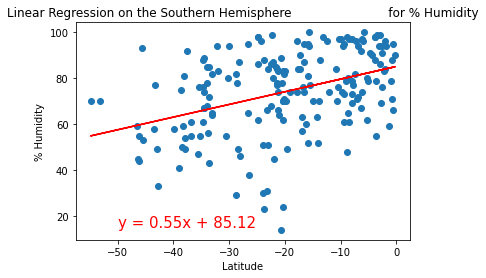

In [67]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

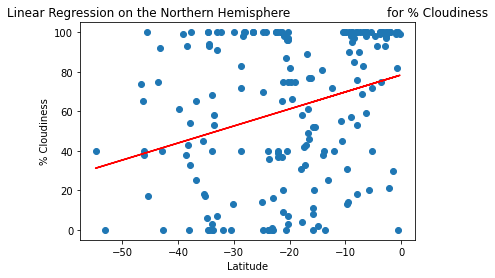

In [70]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))

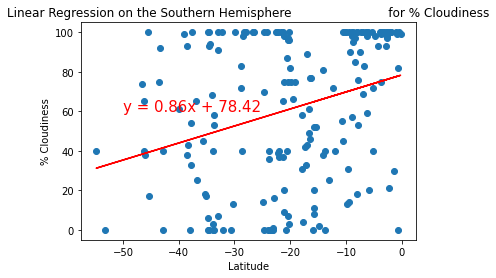

In [71]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

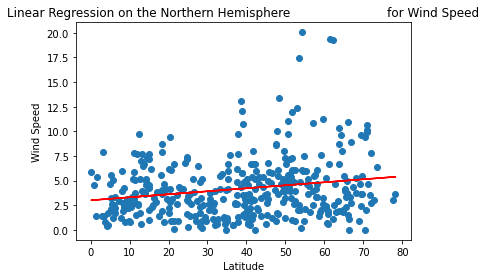

In [72]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

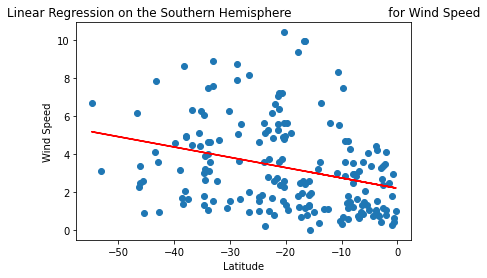

In [73]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))

In [74]:
#pip install gmaps

Note: you may need to restart the kernel to use updated packages.
  Created wheel for gmaps: filename=gmaps-0.9.0-py2.py3-none-any.whl size=2076111 sha256=7f392b934d71f6324824fd984a391f8e6eb43b68e2fcdcd385cef04d5dce55be
  Stored in directory: c:\users\blaine\appdata\local\pip\cache\wheels\66\ab\29\3032938612273665f0fa4d2fab4e3ecfe86480eaaa40aaee91
Successfully built gmaps


In [83]:
import gmaps
# Import the API key.
from config import g_key

ImportError: cannot import name 'g_key' from 'config' (c:\Users\Blaine\Documents\College\Bootcamp\World_Weather_Analysis\config.py)

In [85]:
# Store the CSV you saved created in part one into a DataFrame.
city_data_df = pd.read_csv("C:\\Users\\Blaine\\Documents\\College\\Bootcamp\\World_Weather_Analysis\\Resources\\cities.csv")
city_data_df.head()

,City_ID,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,0,Hithadhoo,MV,2022-04-07 02:55:32,-0.6000,73.0833,301.05,66,0,0.62
1,1,East London,ZA,2022-04-07 02:55:33,-33.0153,27.9116,288.89,64,7,8.92
2,2,Diapaga,BF,2022-04-07 02:55:33,12.0708,1.7889,304.20,42,84,2.63
3,3,Rikitea,PF,2022-04-07 02:55:34,-23.1203,-134.9692,299.03,66,1,5.25
4,4,Hamilton,US,2022-04-07 02:44:39,39.1834,-84.5333,283.50,89,0,1.54
